<a href="https://colab.research.google.com/github/sisukebe968/Machine-Learning-Regression-Models-using-House-Price-Dataset/blob/main/house_price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [6]:
url = "https://raw.githubusercontent.com/softwareWCU/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv"
df = pd.read_csv(url)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [9]:
df.shape

(545, 13)

### Check for missing values

In [10]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


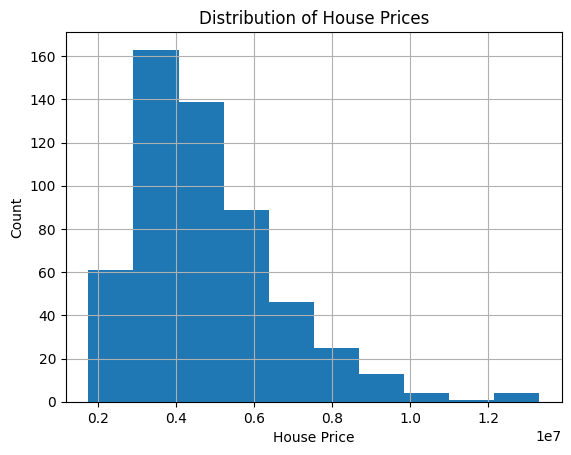

In [11]:
import matplotlib.pyplot as plt

df['price'].hist()
plt.xlabel("House Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()


Select features & target

In [12]:
X = df.drop('price', axis=1)   # features
y = df['price']               # target


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
df_encoded = df.copy()

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'], drop_first=True)


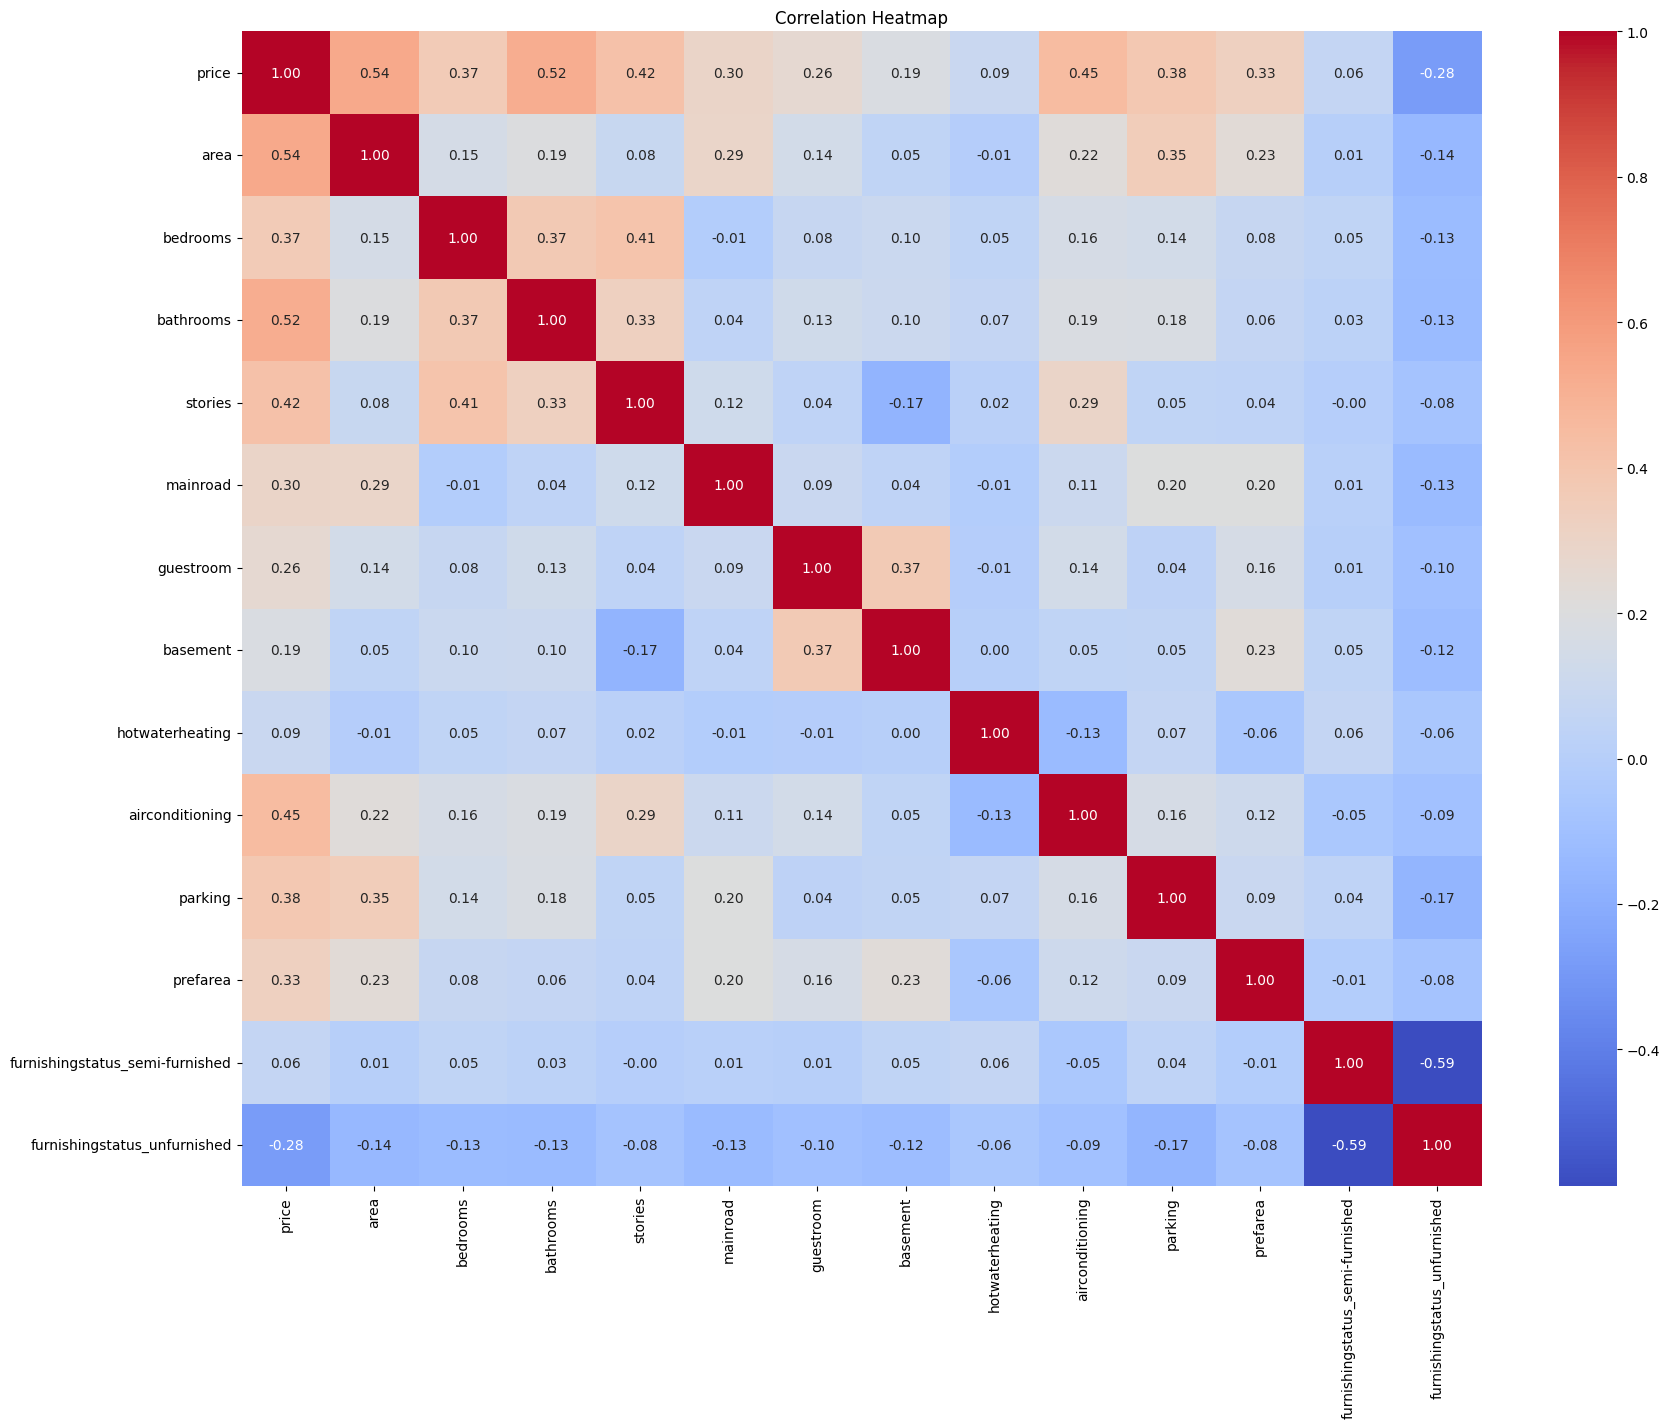

In [16]:

plt.figure(figsize=(20,15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

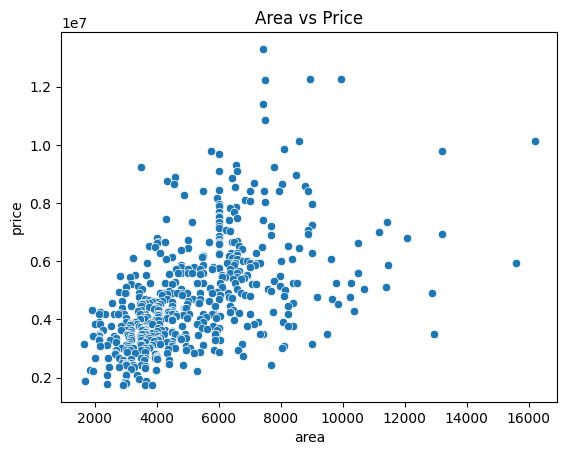

In [17]:
sns.scatterplot(x='area', y='price', data=df)
plt.title("Area vs Price")
plt.show()

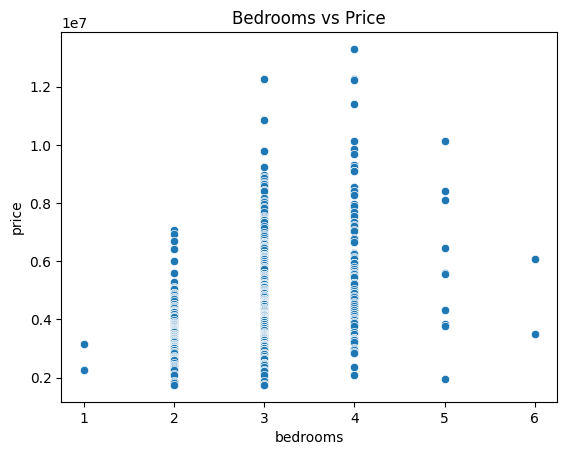

In [18]:
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title("Bedrooms vs Price")
plt.show()

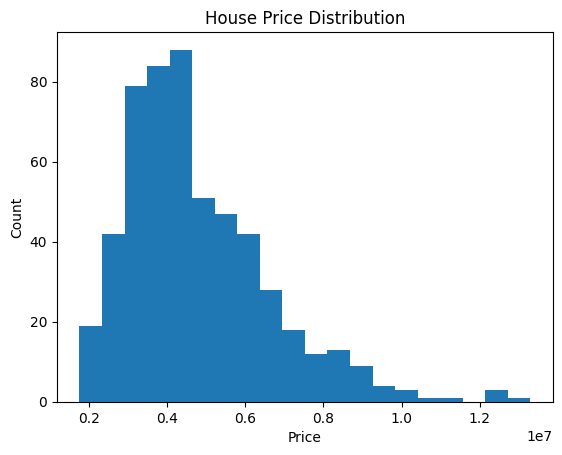

In [19]:
plt.hist(df['price'], bins=20)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("House Price Distribution")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Train Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_processed = df_encoded.drop('price', axis=1)
y_processed = df_encoded['price']

# Re-split the data after encoding to ensure X_train and X_test are numerical
# Using the same random_state for reproducibility as in the previous train_test_split
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train_processed, y_train_processed)

LinearRegression()

## Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_processed)

print("MAE:", mean_absolute_error(y_test_processed, y_pred))
print("MSE:", mean_squared_error(y_test_processed, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_processed, y_pred)))
print("R² Score:", r2_score(y_test_processed, y_pred))

MAE: 970043.4039201637
MSE: 1754318687330.6633
RMSE: 1324506.9600914384
R² Score: 0.6529242642153185


## View model coefficients (important!)

In [23]:
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
2,bathrooms,1.094445e+06
8,airconditioning,7.914267e+05
7,hotwaterheating,6.846499e+05
10,prefarea,6.298906e+05
3,stories,4.074766e+05
6,basement,3.902512e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
9,parking,2.248419e+05
1,bedrooms,7.677870e+04


## Plot: Actual vs Predicted Prices

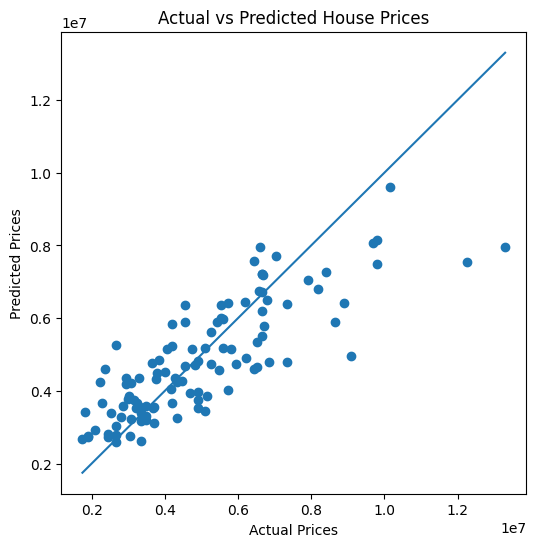

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.show()

## Compare with Other Regression Models

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_processed, y_train_processed)
    preds = model.predict(X_test_processed)
    print(name, "R² Score:", r2_score(y_test_processed, preds))

Linear Regression R² Score: 0.6529242642153185
Decision Tree R² Score: 0.4771459275854347
Random Forest R² Score: 0.6114024924156645


## Improve Model Performance

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [27]:


# Split features & target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


In [28]:

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## K-Nearest Neighbors (KNN) Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize KNN (k=5)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate
print("KNN Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R² Score:", r2_score(y_test, y_pred_knn))

KNN Regression Metrics:
MAE: 1296547.7064220184
MSE: 3213839804128.4404
RMSE: 1792718.5512869665
R² Score: 0.36417150272211063


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
print("\nDecision Tree Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regression Metrics:
MAE: 1195266.0550458715
MSE: 2642802637614.6787
RMSE: 1625669.904259373
R² Score: 0.4771459275854347


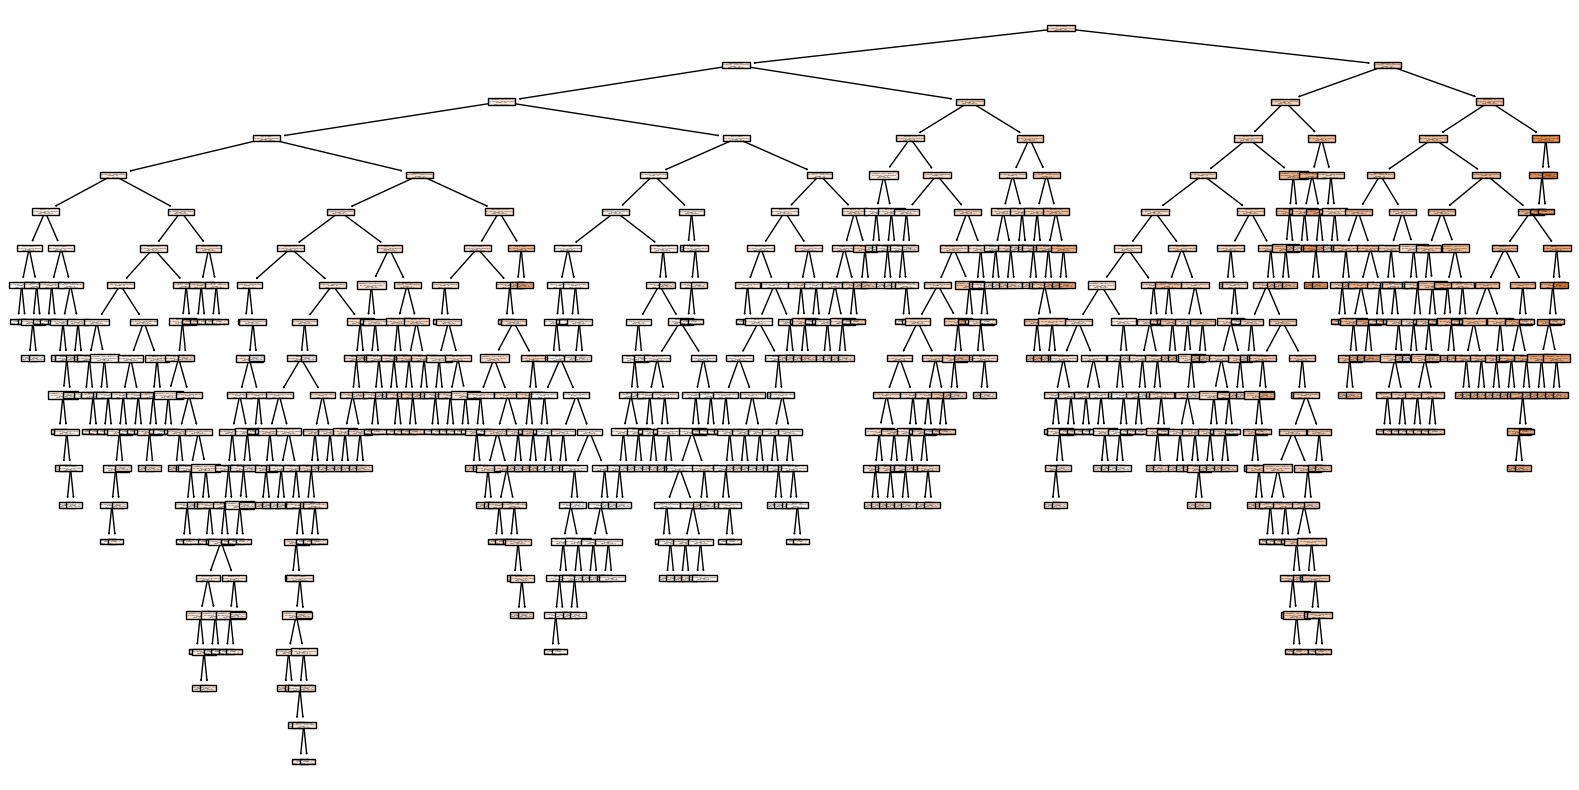

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    filled=True
)
plt.show()

In [ ]:

# Split features & target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


In [ ]:

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Predict on test data
y_pred = dt.predict(X_test)

# Example: predict a new house
new_house = pd.DataFrame({
    'area': [2500],
    'bedrooms': [4],
    'bathrooms': [3],
    'stories': [2],
    'parking': [2],
    'mainroad': [1],        # yes=1, no=0
    'guestroom': [0],       # yes=1, no=0
    'basement': [1],        # yes=1, no=0
    'hotwaterheating': [0], # yes=1, no=0
    'airconditioning': [1], # yes=1, no=0
    'prefarea': [1],        # yes=1, no=0
    'furnishingstatus_semi-furnished': [0],
    'furnishingstatus_unfurnished': [1]
})

# Ensure the columns of new_house match the order and names of X_train
new_house_reindexed = new_house.reindex(columns=X_train.columns, fill_value=0)

predicted_price = dt.predict(new_house_reindexed)
print("Predicted Price:", predicted_price[0])

Predicted Price: 3773000.0
